             - Inputs - 

Learning Rate =  0.5
Iterations =  5000
Hidden Layer Size =  3
Learning Rate =  0.5
             - Outputs - 

weight1 = 
[[ 2.07130403 -4.30728579  2.52861639]
 [ 2.06939965 -4.3142285   2.52036001]
 [-6.72342432  1.51777159 -0.33669022]]


weight2 = 
[[-10.70265009]
 [ -8.0962755 ]
 [  5.44462055]]


Final error =  0.0756
             - Prediction - 

Input =  [0, 1, 1]
Output =  [0.98696316]


,x1,x2,x3,expected,actual,error
0,0.0,0.0,0.0,0.0,0.00,0.00
1,0.0,0.0,1.0,0.0,0.01,0.01
2,0.0,1.0,0.0,0.0,0.01,0.01
3,0.0,1.0,1.0,1.0,0.99,0.01
4,1.0,0.0,0.0,0.0,0.01,0.01
5,1.0,0.0,1.0,1.0,0.99,0.01
6,1.0,1.0,0.0,0.0,0.01,0.01
7,1.0,1.0,1.0,1.0,0.99,0.01


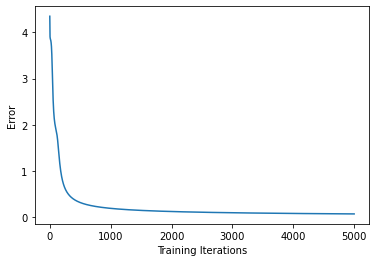

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class TwoLayerNeuralNetwork:
    def __init__(self,input_feature,output_feature,layer1_size,learning_rate,iterations):
        self.input=input_feature
        self.expected=output_feature
        self.layer1_size=layer1_size
        self.learning_rate=learning_rate
        self.iterations=iterations
        np.random.seed(1)
        self.err=np.array([])
        self.weight1=np.random.rand(self.input.shape[1],self.layer1_size)
        self.weight2=np.random.rand(self.layer1_size,self.expected.shape[1])
        self.display_values()
        
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    def feed_forward(self):
        self.layer1 = self.sigmoid(np.dot(self.input,self.weight1))
        self.output = self.sigmoid(np.dot(self.layer1,self.weight2))
        
    def error(self):
        return (self.expected - self.output)
    
    def back_propagate(self):
        del_w2 = np.dot(self.layer1.T, 2 * self.error() * self.sigmoid_derivative(self.output))
        del_w1 = np.dot(self.input.T,  (np.dot(2 * self.error() * self.sigmoid_derivative(self.output), self.weight2.T) * self.sigmoid_derivative(self.layer1)))
        
        self.weight2 += self.learning_rate * del_w2
        self.weight1 += self.learning_rate * del_w1
        
    def abs_error(self):
        return abs(self.error())
    
    def train(self):
        for epoch in range(self.iterations):
            self.feed_forward()
            e=self.abs_error().sum()
            self.err=np.append(self.err,e)
            self.back_propagate()
            
    def final_error(self):
        return np.round(self.err[self.iterations-1],4)
    
    def format_output(self):
        y1=np.round(self.output,2)
        y=np.append(self.expected,y1,axis=1)
        x=np.append(self.input,y,axis=1)
        x=np.append(x,np.round(self.abs_error(),2),axis=1)
        return x
    
    def display_values(self):
        print("======================================")
        print("             - Inputs - \n")
        print("Learning Rate = ",self.learning_rate)
        print("Iterations = ",self.iterations)
        print("Hidden Layer Size = ",self.layer1_size)
        print("Learning Rate = ",self.learning_rate)
        
    def display_outputs(self):
        print("======================================")
        print("             - Outputs - ")
        print("\nweight1 = ")
        print(self.weight1)
        print("\n\nweight2 = ")
        print(self.weight2)
        print("\n\nFinal error = ",self.final_error())
        plt.plot(nn.err)
        plt.xlabel("Training Iterations")
        plt.ylabel("Error")
        return pd.DataFrame(self.format_output(),columns=['x1', 'x2', 'x3','expected','actual','error'])
        
    def predict(self,x,weight1,weight2):
        layer1 = self.sigmoid(np.dot(x,weight1))
        output = self.sigmoid(np.dot(layer1,weight2))
        print("======================================")
        print("             - Prediction - \n")
        print("Input = ",x)
        print("Output = ", output)
        return output
        
        
learning_rate=0.5
iterations=5000
hidden_layer_size=3

training_x=np.array([[0,0,0],
            [0,0,1],
            [0,1,0],
            [0,1,1],
            [1,0,0],
            [1,0,1],
            [1,1,0],
            [1,1,1],
           ])
training_y=np.array([[0,0,0,1,0,1,0,1]]).T

nn = TwoLayerNeuralNetwork(training_x,training_y,hidden_layer_size,learning_rate,iterations)
nn.train()
df2 = nn.display_outputs()
out=nn.predict([0,1,1],nn.weight1,nn.weight2)
df2
